<a href="https://colab.research.google.com/github/sdesuzane/data_science-Alura/blob/tmdb-analysis/TMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")

# Explorando o dataset

In [ ]:
tmdb.info() # tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
print(f"Linhas: {tmdb.shape[0]}, Colunas: {tmdb.shape[1]}") # verificando quantas linhas e colunas tem

Linhas: 4803, Colunas: 20


In [ ]:
tmdb["original_title"].nunique() # valores unicos

4801

In [ ]:
tmdb.isnull().sum() # valores nulos na coluna

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


# Análise básica

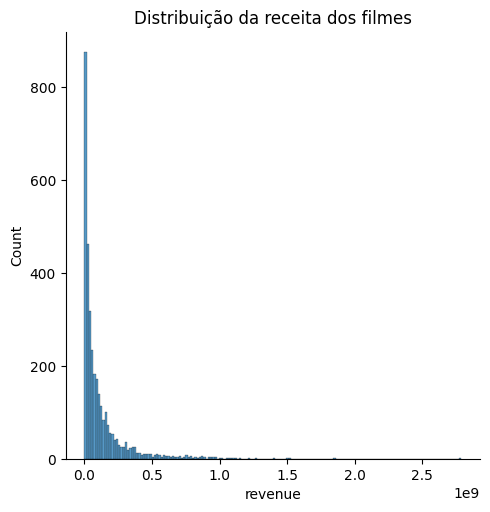

In [ ]:
# verificando a distribuição dos valores
com_faturamento = tmdb.query('revenue > 0')
sns.displot(com_faturamento["revenue"]) # 1e9 ta na casa do bilão, poucos chegaram na casa do bilhão de faturamento
plt.title("Distribuição da receita dos filmes")
plt.show()

In [ ]:
# maior receita
max_faturamento = tmdb.loc[tmdb["revenue"].idxmax()]
print(max_faturamento[['title', 'revenue']])

title          Avatar
revenue    2787965087
Name: 0, dtype: object


In [ ]:
# maior orçamento
max_orcamento = tmdb.loc[tmdb["budget"].idxmax()]
print(max_orcamento[['title', 'budget']])

title     Pirates of the Caribbean: On Stranger Tides
budget                                      380000000
Name: 17, dtype: object


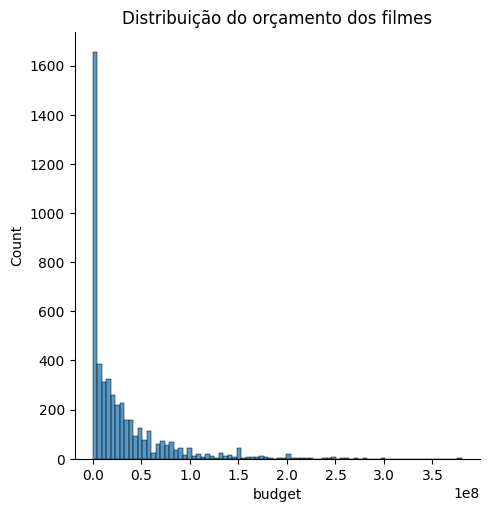

In [ ]:
# verificando a distribuição dos orçamentos
com_orcamento = tmdb.query("budget > 0")
sns.displot(tmdb["budget"])
plt.title("Distribuição do orçamento dos filmes")
plt.show()

In [ ]:
# verificando o genero mais comum
from collections import Counter

genero = tmdb['genres'].dropna().str.split('|').sum()
mais_comum = Counter(genero).most_common(5)
print(mais_comum)

[('[{"id": 18, "name": "Drama"}]', 370), ('[{"id": 35, "name": "Comedy"}]', 282), ('[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]', 164), ('[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]', 144), ('[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]', 142)]


# Tendencias temporais

In [ ]:
# filmes lancados por ano

tmdb_filmes['lancado_ano'] = pd.to_datetime(tmdb['release_date']).dt.year
filmes_por_ano = tmdb['lancado_ano'].value_counts().sort_index()
filmes_por_ano.plot(kind='bar', figsize=(10, 6))
plt.title('numero de filmes lancados por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()